<a href="https://colab.research.google.com/github/priyadarshi0007/TimeSeries-AIEngineering/blob/master/Time_Series_Using_Prophet_MultiVariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import datetime
import pandas as pd
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

print("import succesfull")

import succesfull


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/nyc_energy_consumption.csv')

In [ ]:
df['timeStamp']= pd.to_datetime(df['timeStamp'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timeStamp  49205 non-null  datetime64[ns]
 1   demand     49124 non-null  float64       
 2   precip     48975 non-null  float64       
 3   temp       49019 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.5 MB


In [ ]:
def printStats(dataframe):
  print("Rows     :", dataframe.shape[0])
  print("Columns  :", dataframe.shape[1])
  print("\n Features \n", dataframe.columns.to_list())
  print("\n Missing Values \n", dataframe.isnull().any())
  print("\n Unique Values \n", dataframe.nunique())

In [ ]:
printStats(df)

Rows     : 49205
Columns  : 4

 Features 
 ['timeStamp', 'demand', 'precip', 'temp']

 Missing Values 
 timeStamp    False
demand        True
precip        True
temp          True
dtype: bool

 Unique Values 
 timeStamp    49205
demand       40972
precip        1004
temp          7580
dtype: int64


In [ ]:
fig = px.line(df, x = 'timeStamp',y = 'demand',title = 'NYC_Energy_Consumption')

fig.update_xaxes(
    rangeslider_visible= True,
    rangeselector=dict(
                        buttons = list([
                        dict(count = 1,label = '1m',step='month',stepmode = "backward"),
                        dict(count = 2,label = '6m',step='month',stepmode = "backward"),
                        dict(count = 3,label = '6mYTD',step='month',stepmode = "todate"),
                        dict(count = 4,label = '2y',step='year',stepmode = "backward"),
                        dict(count = 5,label = '3y',step='year',stepmode = "backward"),
                        dict(step= 'all')
                            ])        
                        )
                   )
fig.show()

In [ ]:
df.head()

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0,46.13
1,2012-01-01 01:00:00,4752.1,0.0,45.89
2,2012-01-01 02:00:00,4542.6,0.0,45.04
3,2012-01-01 03:00:00,4357.7,0.0,45.03
4,2012-01-01 04:00:00,4275.5,0.0,42.61


In [ ]:
ny_df =df.set_index('timeStamp')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f19dc816cc0>,
      dtype=object)

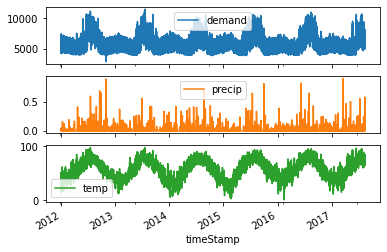

In [ ]:
ny_df.plot(subplots = True)

In [ ]:
ny_df_daily = ny_df.resample('D').mean()

In [ ]:
ny_df_daily['demand']= ny_df_daily['demand'].fillna(method = 'ffill')
ny_df_daily['temp']= ny_df_daily['temp'].fillna(method = 'ffill')
ny_df_daily['precip']= ny_df_daily['precip'].fillna(method = 'ffill')

In [ ]:
from fbprophet import Prophet

In [ ]:
ny_df_final = ny_df_daily.reset_index()[['timeStamp','demand','temp']].rename({'timeStamp':'ds','demand':'y','temp':'temp'}, axis='columns')

In [ ]:
ny_df_final.head(2)

,ds,y,temp
0,2012-01-01,4954.833333,46.510000
1,2012-01-02,5302.954167,40.496667


In [ ]:
ny_df_final['month']= ny_df_final['ds'].dt.month

In [ ]:
ny_df_final.head(2)

,ds,y,temp,month
0,2012-01-01,4954.833333,46.510000,1
1,2012-01-02,5302.954167,40.496667,1


In [ ]:
fig = px.line(ny_df_final, x = 'ds',y = 'y',title = 'NYC_Energy_Consumption', hover_data=['temp','month'])

fig.update_xaxes(
    rangeslider_visible= True,
    rangeselector=dict(
                        buttons = list([
                        dict(count = 1,label = '1m',step='month',stepmode = "backward"),
                        dict(count = 2,label = '6m',step='month',stepmode = "backward"),
                        dict(count = 3,label = '6mYTD',step='month',stepmode = "todate"),
                        dict(count = 4,label = '2y',step='year',stepmode = "backward"),
                        dict(count = 5,label = '3y',step='year',stepmode = "backward"),
                        dict(step= 'all')
                            ])        
                        )
                   )
fig.show()

In [22]:
ny_df_final[['month','temp']].groupby('month').agg({'temp':{'max','min','mean'}})

temp                      
             max       mean        min
month                                 
1      55.420455  33.432140   9.507917
2      59.360000  34.517758   9.015000
3      67.878333  41.419884  20.291667
4      72.992083  52.600204  33.045833
5      82.576250  62.543994  48.090833
6      86.916667  71.334418  52.405833
7      89.606667  77.595627  66.417083
8      87.426250  75.525947  68.042083
9      84.448750  69.550306  57.274583
10     74.277500  58.642895  42.106250
11     67.606250  47.225638  27.172500
12     64.735000  41.520068  22.429583

In [23]:
ny_df_final[['y','temp']].corr()

,y,temp
y,1.000000,0.560138
temp,0.560138,1.000000


In [25]:
ny_df_final.query('temp>80')[['y','temp']].corr()

,y,temp
y,1.000000,0.552918
temp,0.552918,1.000000


In [26]:
ny_df_final.query('temp<=80')[['y','temp']].corr()

,y,temp
y,1.000000,0.469771
temp,0.469771,1.000000


In [27]:
def summer_temp(temp):
  if temp>80:
    return 1
  else:
    return 0

In [28]:
ny_df_final['summer_temp'] = ny_df_final['temp'].apply(summer_temp)

In [29]:
ny_df_final['month_bins'] = pd.cut(ny_df_final['month'],bins=3,labels=False)

In [30]:
ny_df_final.head(5)

,ds,y,temp,month,summer_temp,month_bins
0,2012-01-01,4954.833333,46.510000,1,0,0
1,2012-01-02,5302.954167,40.496667,1,0,0
2,2012-01-03,6095.512500,26.672500,1,0,0
3,2012-01-04,6336.266667,20.585000,1,0,0
4,2012-01-05,6130.245833,33.577500,1,0,0


In [31]:
train = ny_df_final[(ny_df_final['ds']>='2012-01-01') & (ny_df_final['ds']<='2017-04-30')]
test = ny_df_final[(ny_df_final['ds']>'2017-04-30')]

In [32]:
train.shape

(1947, 6)

In [33]:
test.shape


(104, 6)

In [34]:
test

,ds,y,temp,month,summer_temp,month_bins
1947,2017-05-01,5417.231583,60.300833,5,0,1
1948,2017-05-02,5697.950042,67.537917,5,0,1
1949,2017-05-03,5354.628500,59.413333,5,0,1
1950,2017-05-04,5235.704833,54.877083,5,0,1
1951,2017-05-05,5358.639500,55.720833,5,0,1
...,...,...,...,...,...,...
2046,2017-08-08,6471.626042,71.039167,8,0,1
2047,2017-08-09,6811.112167,73.852500,8,0,1
2048,2017-08-10,5582.297000,75.217500,8,0,1
2049,2017-08-11,5582.297000,72.767917,8,0,1


In [35]:
m = Prophet(interval_width=0.95,yearly_seasonality=True)

In [36]:
#
m.add_regressor('summer_temp',standardize=False)
m.add_regressor('month_bins',standardize=False,mode='multiplicative')

In [37]:
m.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [38]:
m.params

OrderedDict([('k', array([[0.14760422]])),
             ('m', array([[0.58876607]])),
             ('delta',
              array([[-4.71416526e-08, -6.41586311e-06, -1.82744926e-01,
                      -1.67782383e-07, -1.74103167e-08,  1.22142120e-02,
                       7.69355196e-03,  2.98750794e-03,  9.89830150e-08,
                       3.31189176e-08, -3.32094703e-08, -3.81719061e-02,
                      -2.42237664e-05,  7.15586204e-08,  1.40721628e-01,
                       3.60042834e-07, -3.04861026e-07, -9.94059548e-02,
                      -4.33196683e-02,  3.01139014e-08,  6.19431008e-08,
                       5.68495201e-08,  3.76665581e-02,  2.84149406e-02,
                       1.32793754e-07]])),
             ('sigma_obs', array([[0.03884209]])),
             ('beta',
              array([[-0.03548167, -0.05910135,  0.04945314,  0.04015359, -0.00950002,
                      -0.00176236, -0.007792  , -0.00252906,  0.00343317, -0.00585251,
                 

In [39]:
future = m.make_future_dataframe(periods=104)
future.tail()

,ds
2046,2017-08-08
2047,2017-08-09
2048,2017-08-10
2049,2017-08-11
2050,2017-08-12


In [40]:
future['summer_temp']=ny_df_final['summer_temp']

In [42]:
future['month_bins']=ny_df_final['month_bins']

In [43]:
future

,ds,summer_temp,month_bins
0,2012-01-01,0,0
1,2012-01-02,0,0
2,2012-01-03,0,0
3,2012-01-04,0,0
4,2012-01-05,0,0
...,...,...,...
2046,2017-08-08,0,1
2047,2017-08-09,0,1
2048,2017-08-10,0,1
2049,2017-08-11,0,1


In [44]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2046,2017-08-08,7383.695055,6631.392714,8121.525496
2047,2017-08-09,7394.540415,6577.438794,8154.803057
2048,2017-08-10,7364.877855,6617.215723,8140.791564
2049,2017-08-11,7314.672167,6528.488204,8103.408519
2050,2017-08-12,6733.792052,5902.418343,7465.725278


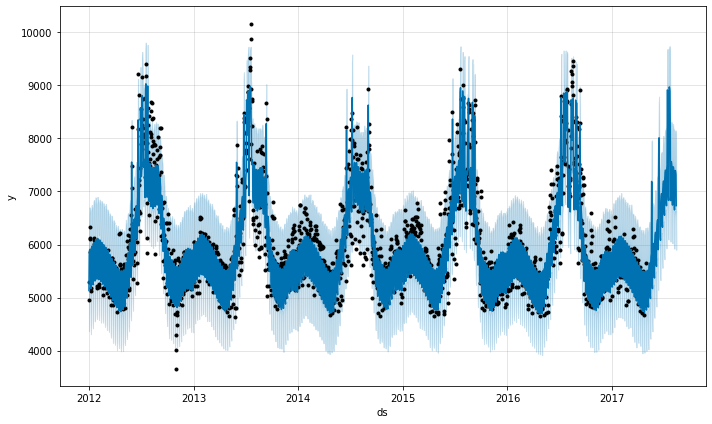

In [45]:
fig1 = m.plot(forecast)
#95% Confidence interval is the light blue color
#the black dots are actual values 
#the dark blue is the y_hat or forecasted value

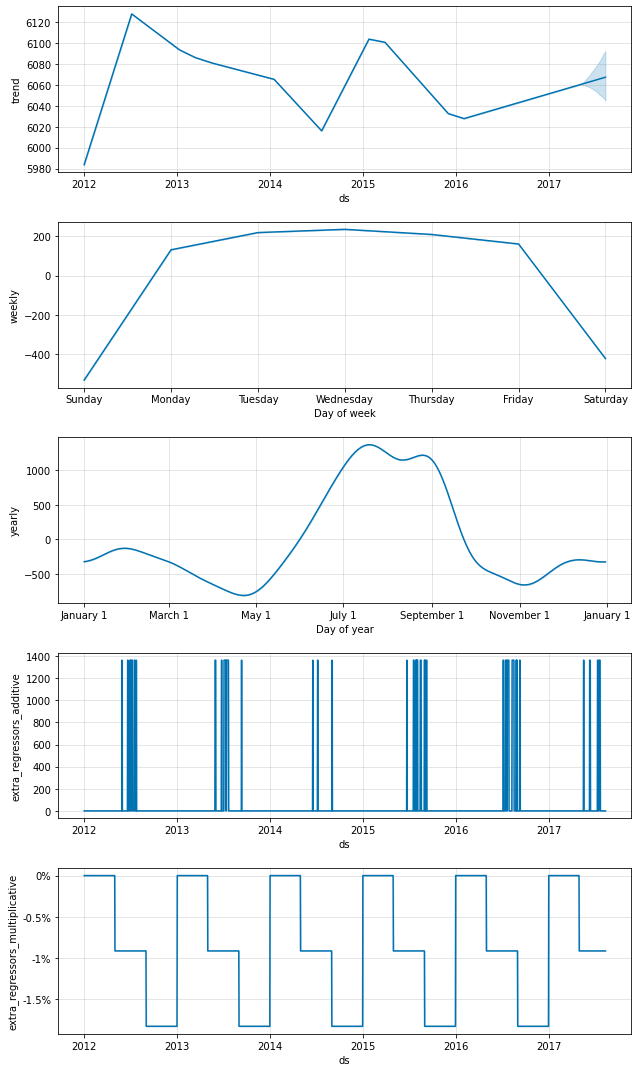

In [46]:
fig2 = m.plot_components(forecast)

In [53]:
from fbprophet.diagnostics import cross_validation,performance_metrics
cv_results = cross_validation(model = m,initial = '731 days',horizon='365 days')
df_p = performance_metrics(cv_results)
df_p

INFO:fbprophet:Making 5 forecasts with cutoffs between 2014-05-01 00:00:00 and 2016-04-30 00:00:00


,horizon,mse,rmse,mae,mape,mdape,coverage
0,36 days 12:00:00,204293.922864,451.988853,352.610429,0.062543,0.051056,0.901099
1,37 days 00:00:00,210424.439085,458.720437,359.614485,0.063723,0.051274,0.895604
2,37 days 12:00:00,211653.376540,460.058014,361.875027,0.064102,0.051798,0.895604
3,38 days 00:00:00,215758.752010,464.498388,365.841034,0.064497,0.053251,0.890110
4,38 days 12:00:00,217944.760867,466.845543,369.633793,0.065097,0.054411,0.890110
...,...,...,...,...,...,...,...
653,363 days 00:00:00,156476.433386,395.571022,334.336980,0.061215,0.060978,0.978022
654,363 days 12:00:00,156952.382181,396.172162,334.121377,0.061178,0.060978,0.978022
655,364 days 00:00:00,160084.466586,400.105569,336.855265,0.061888,0.061735,0.972527
656,364 days 12:00:00,159558.111682,399.447258,335.652320,0.061691,0.061467,0.972527


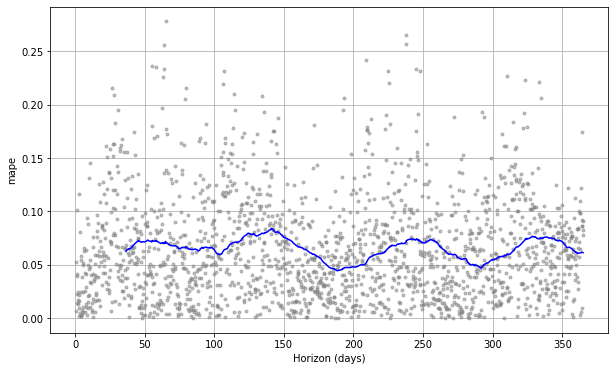

In [55]:
from fbprophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(cv_results,metric='mape')

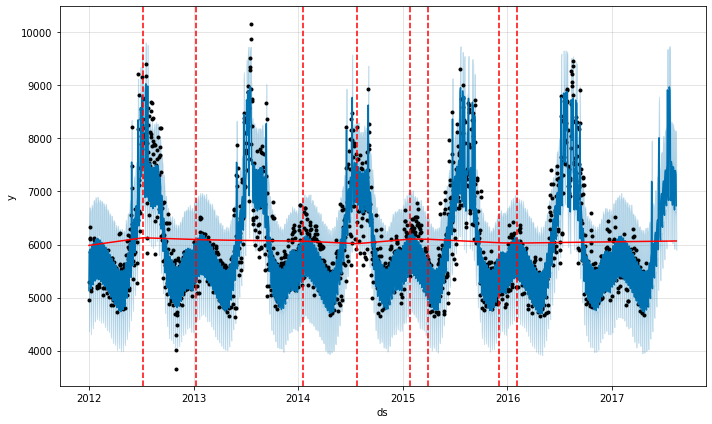

In [47]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),m,forecast)

In [48]:
deltas = m.params['delta'].mean(0)
deltas

array([-4.71416526e-08, -6.41586311e-06, -1.82744926e-01, -1.67782383e-07,
       -1.74103167e-08,  1.22142120e-02,  7.69355196e-03,  2.98750794e-03,
        9.89830150e-08,  3.31189176e-08, -3.32094703e-08, -3.81719061e-02,
       -2.42237664e-05,  7.15586204e-08,  1.40721628e-01,  3.60042834e-07,
       -3.04861026e-07, -9.94059548e-02, -4.33196683e-02,  3.01139014e-08,
        6.19431008e-08,  5.68495201e-08,  3.76665581e-02,  2.84149406e-02,
        1.32793754e-07])

In [49]:
range(len(deltas))

range(0, 25)

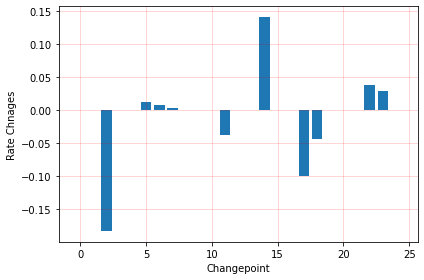

In [50]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111)
ax.bar(range(len(deltas)),deltas)
ax.grid(True,which='major',c='red',ls='-',alpha=0.2)
ax.set_ylabel('Rate Chnages')
ax.set_xlabel('Changepoint')
fig.tight_layout()
#Prophet plots around 25 chnage points

In [51]:
m.changepoints

62     2012-03-03
124    2012-05-04
187    2012-07-06
249    2012-09-06
311    2012-11-07
373    2013-01-08
436    2013-03-12
498    2013-05-13
560    2013-07-14
622    2013-09-14
685    2013-11-16
747    2014-01-17
809    2014-03-20
871    2014-05-21
934    2014-07-23
996    2014-09-23
1058   2014-11-24
1120   2015-01-25
1183   2015-03-29
1245   2015-05-30
1307   2015-07-31
1369   2015-10-01
1432   2015-12-03
1494   2016-02-03
1556   2016-04-05
Name: ds, dtype: datetime64[ns]